<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/linear%20regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [0]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [0]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [0]:
data = np.loadtxt('data2.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set

In [0]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [51]:
mean


array([2000.68085106,    3.17021277])

In [52]:
std

array([7.86202619e+02, 7.52842809e-01])

In [53]:
X_train

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [0]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 300000
theta, cost = linear_regression(X_train, y_train,0.0001, 300000)

In [55]:
theta

array([[340412.65957418, 109447.6892473 ,  -6578.24763182]])

Text(0, 0.5, 'Cost')

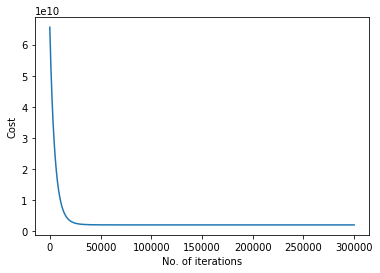

In [56]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Text(0.5, 0, 'Actual Housing Price')

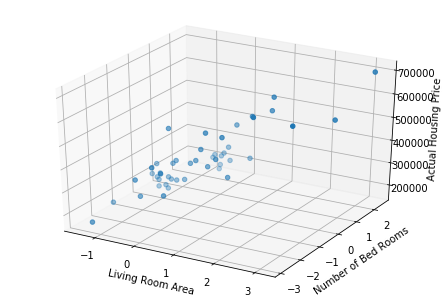

In [64]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)

Text(0.5, 0, 'Housing Price Predictions')

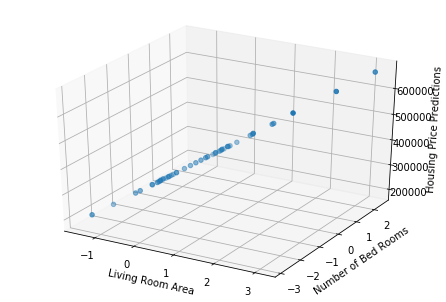

In [65]:
# Getting the predictions...
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[1])
sequence_containing_y_vals = list(X_train.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Housing Price Predictions', fontsize=10)

In [66]:
predictions

array([356283.07200568, 286120.96103633, 397489.3911464 , 269244.09880006,
       472277.83703991, 330979.14133776, 276933.06555225, 262037.53802503,
       255494.64275606, 271364.64404675, 324714.66714407, 341805.17609137,
       326492.01695123, 669293.13497921, 239903.06254066, 374830.4606936 ,
       255879.88718685, 235448.32533625, 417846.51682361, 476593.36370667,
       309369.12082181, 334951.472565  , 286677.80318688, 327777.29897209,
       604913.0922264 , 216515.69221754, 266353.0646918 , 415029.91888874,
       369647.28361888, 430482.28856651, 328130.15622076, 220070.39183187,
       338635.72090783, 500087.5573853 , 306756.50778882, 263429.64340141,
       235865.95694917, 351443.09037048, 641418.64026957, 355619.40649961,
       303768.31213418, 374937.28404911, 411999.67424283, 230436.7459813 ,
       190729.35557246, 312464.13983196, 230854.37759421])

In [67]:
y_train

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [69]:
print(np.mean((predictions-y_train)**2)/2)

2043280050.6078875


In [70]:
cost[-1]

2043280050.6078873